 This program analyzes:(1) The word frequency of covid-19 of nevada hhs part by month in 2021 (2) The attitude towards covid-19 of nevada hhs part by month in 2021

## Clean the data

In [1]:
import nltk

In [2]:
#nltk.download()

## Load Data

In [3]:
import json
with open('nv_hhs_m_2021.json', 'r') as file:
    data= json.load(file)

In [4]:
data.keys()

dict_keys(['4', '5', '2', '3'])

In [5]:
data['2']

['\nMINUTES OF THE MEETING \nOF THE \nASSEMBLY COMMITTEE ON HEALTH AND HUMAN SERVICES \n \nEighty-First Session \nFebruary 3, 2021 \n \nThe  Committee  on  Health  and  Human  Services  was  called  to  order  by \nChair Rochelle T. Nguyen at 1:42 p.m. on Wednesday, February 3, 2021, Online.  Copies of \nthe minutes, including the Agenda (Exhibit A), the Attendance Roster (Exhibit B), and other \nsubstantive exhibits, are available and on file in the Research Library of the Legislative \nCounsel  Bureau  and  on  the  Nevada  Legislature\'s  website  at \nwww.leg.state.nv.us/App/NELIS/REL/81st2021. \n \nCOMMITTEE MEMBERS PRESENT: \n \nAssemblywoman Rochelle T. Nguyen, Chair \nAssemblywoman Sarah Peters, Vice Chair \nAssemblywoman Teresa Benitez-Thompson \nAssemblywoman Annie Black \nAssemblywoman Michelle Gorelow \nAssemblyman Gregory T. Hafen II \nAssemblywoman Lisa Krasner \nAssemblyman Andy Matthews \nAssemblyman David Orentlicher \nAssemblywoman Shondra Summers-Armstrong \nAssembly

In [6]:
data.keys()

dict_keys(['4', '5', '2', '3'])

In [7]:
raw={}

In [8]:
for i in data.keys():
    raw[i] = json.dumps(data[i]) # convert json to string

## Processing Raw Text

### Tokenization

Break up the string into words and punctuation, and create a list of words and punctuation.

In [9]:
from nltk import word_tokenize

In [10]:
text={}
for i in raw.keys():
    text[i]= [word.lower() for word in word_tokenize(raw[i])]

In [11]:
type(text['2'])

list

### Stopwords

Stopwords are non-content words that primarily has only grammatical function

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords_en = set(stopwords.words('english')) # set checking is faster than list
print(stopwords_en)

{"isn't", 'no', 'through', 'being', 'about', 'how', 'y', 'ours', 'above', 'we', "weren't", 'you', 'been', 'm', 'any', 'won', "wouldn't", 'my', 'were', 'yours', 'are', 'over', 'own', 'during', "hadn't", 'he', "aren't", 'his', "needn't", 'does', 'each', "haven't", 'is', 'am', 'only', 'all', 'hasn', 'their', 'too', 'now', 'such', 'ma', "you'd", 'weren', 'our', 'ain', "shouldn't", 'can', 'to', 'herself', 't', 'but', 'again', 'at', 'there', 'why', "shan't", 'after', 'few', 'because', 'before', 'more', 'those', "you're", 'was', 'out', 'them', "won't", 've', 'here', 'o', "you'll", 'didn', 'some', 'what', 'between', 'she', 'its', 'and', 'couldn', 'just', 'll', 'by', 'hadn', 'wasn', 'will', 'him', 'this', "didn't", 'had', 'me', 'yourselves', 'so', 'has', "don't", 'mustn', 'they', 'then', 'doesn', 'hers', 'on', 'haven', 'both', "wasn't", 'than', 'shouldn', 'for', 'myself', 'of', "that'll", 'needn', 'or', 're', 'if', 'mightn', 'shan', 'should', 'themselves', 'who', 'whom', 'ourselves', 'until', '

Ofen, we want to remove stopwords when we want to capture only the gist of the documemt

In [14]:
type(text['2'])
text_no_stopwords={}

In [15]:
for i in text.keys():
    text_no_stopwords[i] = [word for word in text[i] if word not in stopwords_en]

In [16]:
type(text_no_stopwords)

dict

Often, we want to remove the punctuations from the documents too.

In [17]:
from string import punctuation
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
text_no_stopwords.keys()

dict_keys(['4', '5', '2', '3'])

In [19]:
text_no_stopwords_punc={}
for i in text_no_stopwords.keys():
    text_no_stopwords_punc[i] = [word for word in text_no_stopwords[i] if word not in punctuation]

In [20]:
type(text_no_stopwords_punc['2'])

list

### Lemmatization
Trying to find the root word with linguistics rules (with the use of regexes)

In [21]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [22]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(text)]

In [23]:
lemmatize_sent(text_no_stopwords_punc['2'])

['``',
 '\\nminutes',
 'meet',
 '\\nof',
 '\\nassembly',
 'committee',
 'health',
 'human',
 'service',
 '\\n',
 '\\neighty-first',
 'session',
 '\\nfebruary',
 '3',
 '2021',
 '\\n',
 '\\nthe',
 'committee',
 'health',
 'human',
 'service',
 'call',
 'order',
 '\\nchair',
 'rochelle',
 't.',
 'nguyen',
 '1:42',
 'p.m.',
 'wednesday',
 'february',
 '3',
 '2021',
 'online',
 'copy',
 '\\nthe',
 'minute',
 'include',
 'agenda',
 'exhibit',
 'attendance',
 'roster',
 'exhibit',
 'b',
 '\\nsubstantive',
 'exhibit',
 'available',
 'file',
 'research',
 'library',
 'legislative',
 '\\ncounsel',
 'bureau',
 'nevada',
 'legislature',
 "'s",
 'website',
 '\\nwww.leg.state.nv.us/app/nelis/rel/81st2021',
 '\\n',
 '\\ncommittee',
 'member',
 'present',
 '\\n',
 '\\nassemblywoman',
 'rochelle',
 't.',
 'nguyen',
 'chair',
 '\\nassemblywoman',
 'sarah',
 'peter',
 'vice',
 'chair',
 '\\nassemblywoman',
 'teresa',
 'benitez-thompson',
 '\\nassemblywoman',
 'annie',
 'black',
 '\\nassemblywoman',
 'mic

In [24]:
nltk.pos_tag(text['2'])

[('[', 'NN'),
 ('``', '``'),
 ('\\nminutes', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('meeting', 'NN'),
 ('\\nof', 'VBD'),
 ('the', 'DT'),
 ('\\nassembly', 'NNP'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('health', 'NN'),
 ('and', 'CC'),
 ('human', 'JJ'),
 ('services', 'NNS'),
 ('\\n', 'VBP'),
 ('\\neighty-first', 'JJ'),
 ('session', 'NN'),
 ('\\nfebruary', 'JJ'),
 ('3', 'CD'),
 (',', ','),
 ('2021', 'CD'),
 ('\\n', 'SYM'),
 ('\\nthe', 'NNP'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('health', 'NN'),
 ('and', 'CC'),
 ('human', 'JJ'),
 ('services', 'NNS'),
 ('was', 'VBD'),
 ('called', 'VBN'),
 ('to', 'TO'),
 ('order', 'NN'),
 ('by', 'IN'),
 ('\\nchair', 'NNP'),
 ('rochelle', 'NNP'),
 ('t.', 'VBD'),
 ('nguyen', 'NNS'),
 ('at', 'IN'),
 ('1:42', 'CD'),
 ('p.m.', 'NN'),
 ('on', 'IN'),
 ('wednesday', 'NN'),
 (',', ','),
 ('february', 'JJ'),
 ('3', 'CD'),
 (',', ','),
 ('2021', 'CD'),
 (',', ','),
 ('online', 'NN'),
 ('.', '.'),
 ('copies', 'NNS'),
 ('of', 'IN'),
 ('\\nthe', 'NNP'),
 ('minutes', 

### Remove the line breaks

In [25]:
text_no_stopwords_punc.keys()

dict_keys(['4', '5', '2', '3'])

In [26]:
text_no_stopwords_punc_lb={}
for i in text_no_stopwords_punc.keys():
    text_no_stopwords_punc_lb[i] = [word for word in text_no_stopwords_punc[i] if not word.startswith('\\n')]+ [word[2:] 
                                for word in text_no_stopwords_punc if  word.startswith('\\n')]

In [27]:
type(text_no_stopwords_punc_lb)

dict

In [28]:
nltk.pos_tag(text_no_stopwords_punc_lb['2'])

[('``', '``'),
 ('meeting', 'NN'),
 ('committee', 'NN'),
 ('health', 'NN'),
 ('human', 'JJ'),
 ('services', 'NNS'),
 ('session', 'NN'),
 ('3', 'CD'),
 ('2021', 'CD'),
 ('committee', 'NN'),
 ('health', 'NN'),
 ('human', 'NN'),
 ('services', 'NNS'),
 ('called', 'VBN'),
 ('order', 'NN'),
 ('rochelle', 'NN'),
 ('t.', 'NN'),
 ('nguyen', 'JJ'),
 ('1:42', 'CD'),
 ('p.m.', 'NN'),
 ('wednesday', 'NN'),
 ('february', 'JJ'),
 ('3', 'CD'),
 ('2021', 'CD'),
 ('online', 'NN'),
 ('copies', 'NNS'),
 ('minutes', 'NNS'),
 ('including', 'VBG'),
 ('agenda', 'JJ'),
 ('exhibit', 'NN'),
 ('attendance', 'NN'),
 ('roster', 'NN'),
 ('exhibit', 'NN'),
 ('b', 'NN'),
 ('exhibits', 'VBZ'),
 ('available', 'JJ'),
 ('file', 'NN'),
 ('research', 'NN'),
 ('library', 'JJ'),
 ('legislative', 'JJ'),
 ('bureau', 'NN'),
 ('nevada', 'JJ'),
 ('legislature', 'NN'),
 ("'s", 'POS'),
 ('website', 'JJ'),
 ('members', 'NNS'),
 ('present', 'JJ'),
 ('rochelle', 'JJ'),
 ('t.', 'NN'),
 ('nguyen', 'JJ'),
 ('chair', 'NN'),
 ('sarah', 'NN'

In [29]:
text_no_stopwords_punc_lb.keys()

dict_keys(['4', '5', '2', '3'])

In [30]:
text_no_stopwords_punc_lb_lemma={}
for i in text_no_stopwords_punc_lb.keys():
    text_no_stopwords_punc_lb_lemma[i]=lemmatize_sent(text_no_stopwords_punc_lb[i])

In [31]:
nltk.pos_tag(text_no_stopwords_punc_lb_lemma['2'])

[('``', '``'),
 ('meeting', 'NN'),
 ('committee', 'NN'),
 ('health', 'NN'),
 ('human', 'JJ'),
 ('service', 'NN'),
 ('session', 'NN'),
 ('3', 'CD'),
 ('2021', 'CD'),
 ('committee', 'NN'),
 ('health', 'NN'),
 ('human', 'JJ'),
 ('service', 'NN'),
 ('call', 'NN'),
 ('order', 'NN'),
 ('rochelle', 'NN'),
 ('t.', 'NN'),
 ('nguyen', 'JJ'),
 ('1:42', 'CD'),
 ('p.m.', 'NN'),
 ('wednesday', 'NN'),
 ('february', 'JJ'),
 ('3', 'CD'),
 ('2021', 'CD'),
 ('online', 'NN'),
 ('copy', 'NN'),
 ('minute', 'NN'),
 ('include', 'VBP'),
 ('agenda', 'JJ'),
 ('exhibit', 'NN'),
 ('attendance', 'NN'),
 ('roster', 'NN'),
 ('exhibit', 'NN'),
 ('b', 'JJ'),
 ('exhibit', 'NN'),
 ('available', 'JJ'),
 ('file', 'NN'),
 ('research', 'NN'),
 ('library', 'JJ'),
 ('legislative', 'JJ'),
 ('bureau', 'NN'),
 ('nevada', 'JJ'),
 ('legislature', 'NN'),
 ("'s", 'POS'),
 ('website', 'JJ'),
 ('member', 'NN'),
 ('present', 'JJ'),
 ('rochelle', 'NN'),
 ('t.', 'NN'),
 ('nguyen', 'JJ'),
 ('chair', 'NN'),
 ('sarah', 'NN'),
 ('peter', 'NN'

### Erase the md

In [32]:
text_no_stopwords_punc_lb_lemma.keys()

dict_keys(['4', '5', '2', '3'])

In [33]:
text_no_stopwords_punc_lb_lemma_md={}
for i in text_no_stopwords_punc_lb_lemma.keys():
    text_no_stopwords_punc_lb_lemma_md[i]=[word for word in text_no_stopwords_punc_lb_lemma[i] if nltk.pos_tag([word])[0][1] != 'MD' ]

In [34]:
type(text_no_stopwords_punc_lb_lemma_md)

dict

In [35]:
len(text_no_stopwords_punc_lb_lemma_md['2'])

43186

## Word frequency of covid-19 by month comparison

In [36]:
text_no_stopwords_punc_lb_lemma_md.keys()

dict_keys(['4', '5', '2', '3'])

In [37]:
from nltk.probability import FreqDist
textdist={}
for i in text_no_stopwords_punc_lb_lemma_md.keys():
    textdist[i] = FreqDist(text_no_stopwords_punc_lb_lemma_md[i])


In [38]:
textdist.keys()

dict_keys(['4', '5', '2', '3'])

In [39]:
textdistcov={}
for i in textdist.keys():
    textdistcov[i] = textdist[i].freq('covid-19')*100

In [40]:
textdistcov

{'4': 0.04037413363838234,
 '5': 0.06561777645216614,
 '2': 0.22229426202936137,
 '3': 0.09409796643839197}

In [41]:
b=list(textdistcov.keys())
b.sort()
b

['2', '3', '4', '5']

In [42]:
textdistcov

{'4': 0.04037413363838234,
 '5': 0.06561777645216614,
 '2': 0.22229426202936137,
 '3': 0.09409796643839197}

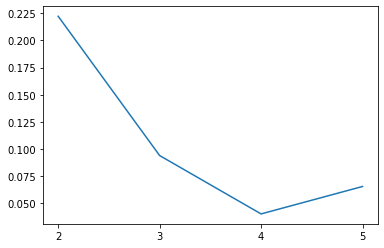

In [43]:
import matplotlib.pyplot as plt
covlist = textdistcov.items()
covlist = sorted(covlist)
x1,y1 = zip(*covlist)
plt.plot(x1,y1)


## Frequency distribution of covid-19 in noun group by month 2021

In [44]:
text_no_stopwords_punc_lb_lemma

{'4': ['``',
  'meeting',
  'committee',
  'health',
  'human',
  'service',
  'session',
  '28',
  '2021',
  'committee',
  'health',
  'human',
  'service',
  'call',
  'order',
  'rochelle',
  't.',
  'nguyen',
  '1:33',
  'p.m.',
  'wednesday',
  'april',
  '28',
  '2021',
  'online',
  '3138',
  'legislative',
  'build',
  '401',
  'south',
  'carson',
  'street',
  'carson',
  'city',
  'nevada',
  'minute',
  'include',
  'agenda',
  'exhibit',
  'attendance',
  'roster',
  'exhibit',
  'b',
  'substantive',
  'exhibit',
  'available',
  'file',
  'research',
  'library',
  'counsel',
  'bureau',
  'nevada',
  'legislature',
  "'s",
  'website',
  'member',
  'present',
  'rochelle',
  't.',
  'nguyen',
  'chair',
  'sarah',
  'peter',
  'vice',
  'chair',
  'teresa',
  'benitez-thompson',
  'annie',
  'black',
  'michelle',
  'gorelow',
  'gregory',
  't.',
  'hafen',
  'ii',
  'lisa',
  'krasner',
  'andy',
  'matthew',
  'david',
  'orentlicher',
  'shondra',
  'summers-armst

In [ ]:
text_no_stopwords_punc_lb_lemma_onn={}
for i in text_no_stopwords_punc_lb_lemma.keys():
    text_no_stopwords_punc_lb_lemma_onn[i]=[word for word in text_no_stopwords_punc_lb_lemma[i] if nltk.pos_tag([word])[0][1] == 'NN' ]

In [ ]:
type(text_no_stopwords_punc_lb_lemma_onn)

In [ ]:
textdistn={}
for i in text_no_stopwords_punc_lb_lemma_onn.keys():
    textdistn[i] = FreqDist(text_no_stopwords_punc_lb_lemma_onn[i])


In [ ]:
textdistncov={}
for i in textdistn.keys():
    textdistncov[i] = textdistn[i].freq('covid-19')*100

In [ ]:
textdistncov

In [ ]:
textdistn['4']['covid-19']

In [ ]:
covnlist = textdistncov.items()
covnlist = sorted(covnlist)
x2,y2 = zip(*covnlist)
plt.plot(x2,y2)

# Sentiment analysis (by month)

In [ ]:
with open('nv_hhs_m_2021.json', 'r') as file:
    data= json.load(file)

In [ ]:
data.keys()

In [ ]:
sentidata={}

for i in data.keys():
    sentidata[i]=' '.join(data[i])
    
  

## Construct the 2021 hhs's sentence list by month

In [55]:
listsen={}

In [56]:
for i in sentidata.keys():
    listsen[i]=nltk.tokenize.sent_tokenize(sentidata[i])

### Filter the sentences which have covid-19

In [57]:
listsen_cov={}
for i in listsen.keys():
    listsen_cov[i]=[sen for sen in listsen[i] if ' COVID-19' in sen]

In [58]:
from textblob import TextBlob
blob={}
for i in listsen_cov.keys():
    blob[i] = TextBlob(' '.join(listsen_cov[i]))


In [59]:
blob.keys()

dict_keys(['4', '5', '2', '3'])

In [60]:
blob

{'4': TextBlob("As part of this effort, it is imperative to acknowledge the heroic efforts 
 undertaken by the health care workforce during the COVID-19 pandemic. This could very possibly lead 
 to  elimination  of  needed  service  lines  we  provide  to  the  community  and  possible  job 
 elimination  for  the  very  employees  who  saved  lives  during  the  COVID-19  pandemic. Is it too hard to make a 
 specific correlation between their law and those rates without taking into consideration other 
 factors like COVID-19, other forms of isolation, weather, or any of those things? She could not have visitors due to COVID-19, so she sent me photos of the huge swath of 
 bare scalp covered with metal staples and the dent in her skull where the bones had been 
 removed. A purchasing coalition  is more essential as the result of COVID-19's 
 financial impact on the State's economy and budget."),
 '5': TextBlob("Even with COVID-19, the lack of access to health care is a real issue. We h

In [64]:
listsen_cov_pol={}
listsen_cov_sen={}
for i in blob.keys():
    polarity=1
    for j in range(len(blob[i].sentences)):
        if blob[i].sentences[j].sentiment.polarity<polarity:
            polarity=blob[i].sentences[j].sentiment.polarity
            sentence=blob[i].sentences[j]
    listsen_cov_pol[i]=polarity
    listsen_cov_sen[i]=sentence

In [65]:
blob['2'].sentences[0].sentiment

Sentiment(polarity=0.15, subjectivity=0.4083333333333333)

In [66]:
listsen_cov_pol

{'4': -0.13541666666666669,
 '5': -0.005952380952380952,
 '2': -0.4,
 '3': -0.21875}

In [67]:
listsen_cov_sen

{'4': Sentence("Is it too hard to make a 
 specific correlation between their law and those rates without taking into consideration other 
 factors like COVID-19, other forms of isolation, weather, or any of those things?"),
 '5': Sentence("Senate Bill 318 (1st Reprint) requires the Division of Public and Behavioral 
 Health  of  the  Department  of  Health  and  Human  Services  and  each  health  district  or 
 department to record the preferred language of every individual who receives COVID-19 
 services; provide limited English proficient individuals with interpretation services, either 
 Assembly Committee on Health and Human Services 
 May 24, 2021 
 Page 29 
  
 in-person or remotely; translate vital documents such as applications or notices related to 
 COVID-19;  translate  governmental  orders  related  to  COVID-19;  and  collaborate  with 
 community-based organizations to ensure all local languages are represented."),
 '2': Sentence("Our COVID-19 ER grant recipients who a

## Plot the lowest polarity of covid sentenses by month

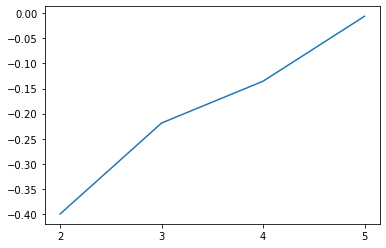

In [68]:
covlistsen = listsen_cov_pol.items()
covlistsen = sorted(covlistsen)
x3,y3 = zip(*covlistsen)
plt.plot(x3,y3)

## Plot the highest polarity of covid sentenses by month

In [70]:
listsen_cov_polp={}
listsen_cov_senp={}
for i in blob.keys():
    polarity=-1
    for j in range(len(blob[i].sentences)):
        if blob[i].sentences[j].sentiment.polarity>polarity:
            polarity=blob[i].sentences[j].sentiment.polarity
            sentence=blob[i].sentences[j]
    listsen_cov_polp[i]=polarity
    listsen_cov_senp[i]=sentence

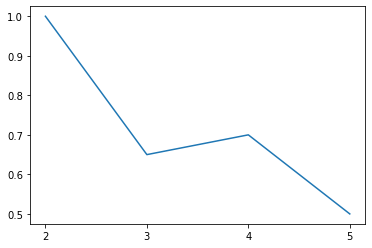

In [71]:
covlistsenp = listsen_cov_polp.items()
covlistsenp = sorted(covlistsenp)
x4,y4 = zip(*covlistsenp)
plt.plot(x4,y4)

In [72]:
listsen_cov_polp

{'4': 0.7, '5': 0.5, '2': 1.0, '3': 0.65}

### Plot the polarity of covid sentenss by month

In [73]:
covsen={}
for i in blob.keys():
    covsen[i]=blob[i].sentiment.polarity

In [74]:
covsen

{'4': 0.08452380952380953,
 '5': 0.16589026915113872,
 '2': 0.1110941886396432,
 '3': 0.06473916532905298}

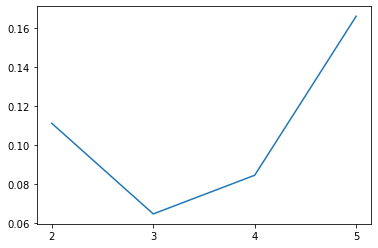

In [75]:
covsensen = covsen.items()
covsensen = sorted(covsensen)
x5,y5 = zip(*covsensen)
plt.plot(x5,y5)